In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
df['Geography_Germany'].value_counts()

Geography_Germany
False    7491
True     2509
Name: count, dtype: int64

In [ ]:
df['Geography_Germany']=df['Geography_Germany'].astype('int')

In [ ]:
df['Geography_Spain']=df['Geography_Spain'].astype('int')
df['Gender_Male']=df['Gender_Male'].astype('int')

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(3,activation='sigmoid', input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8361 - val_loss: 0.4078 - val_accuracy: 0.8313
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8359 - val_loss: 0.4079 - val_accuracy: 0.8331
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8356 - val_loss: 0.4079 - val_accuracy: 0.8338
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8359 - val_loss: 0.4080 - val_accuracy: 0.8319
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8361 - val_loss: 0.4080 - val_accuracy: 0.8306
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4031 - accuracy: 0.8361 - val_loss: 0.4081 - val_accuracy: 0.8313
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8356 - val_loss: 0.4081 - val_accuracy: 0.8319
Epoch 

In [65]:
model.layers[0].get_weights()

[array([[-0.01264519,  0.01346575, -0.35285902],
        [ 3.1510303 , -0.11199433,  3.346426  ],
        [ 0.07990623,  0.01463424, -0.6260092 ],
        [ 0.6432521 , -0.2684684 , -0.8328275 ],
        [-0.10331336,  0.21230537,  0.07658046],
        [ 0.03855206, -0.03006557, -0.22309488],
        [ 1.0851347 ,  2.0530348 ,  1.7257618 ],
        [-0.17588428, -0.19924413, -0.04984738],
        [ 0.15457767, -0.9090419 ,  0.16572204],
        [-0.25289986, -0.20998845,  0.2735222 ],
        [-0.27085432,  0.44392592, -0.20532188]], dtype=float32),
 array([-0.39745623,  0.71716154, -0.40748665], dtype=float32)]

In [66]:
model.layers[1].get_weights()

[array([[ 1.712481 ],
        [-2.9557853],
        [ 1.3706865]], dtype=float32),
 array([-1.3021096], dtype=float32)]

In [67]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [68]:
y_pred=np.where(y_log>0.5,1,0)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.841

In [71]:
from matplotlib import pyplot as plt

In [72]:
history

In [74]:
history.history

{'loss': [0.40320366621017456,
  0.4031471908092499,
  0.40310969948768616,
  0.40312737226486206,
  0.40309473872184753,
  0.4030749797821045,
  0.4030279517173767,
  0.40304768085479736,
  0.40305671095848083,
  0.40299445390701294],
 'accuracy': [0.8360937237739563,
  0.8359375,
  0.8356249928474426,
  0.8359375,
  0.8360937237739563,
  0.8360937237739563,
  0.8356249928474426,
  0.8362500071525574,
  0.8356249928474426,
  0.8356249928474426],
 'val_loss': [0.4078124761581421,
  0.4078848659992218,
  0.4079321324825287,
  0.40803205966949463,
  0.40804797410964966,
  0.4081212878227234,
  0.4080866873264313,
  0.4082283079624176,
  0.40827271342277527,
  0.4083119332790375],
 'val_accuracy': [0.831250011920929,
  0.8331249952316284,
  0.8337500095367432,
  0.8318750262260437,
  0.8306249976158142,
  0.831250011920929,
  0.8318750262260437,
  0.831250011920929,
  0.8318750262260437,
  0.831250011920929]}

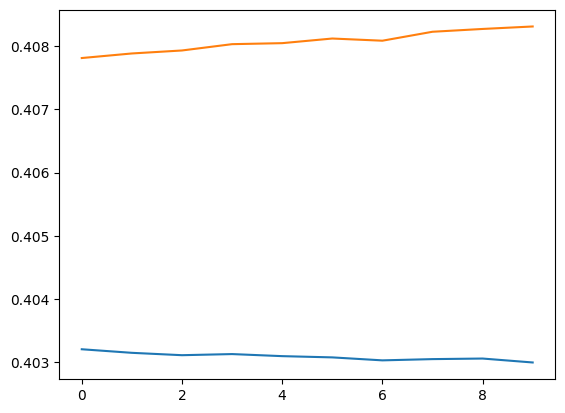

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])